In [ ]:
# TUGAS BESAR ALGORITMA
# Validasi Password: Iteratif vs Rekursif

# Library yang dibutuhkan
import random               # untuk generate password acak
import string               # kumpulan huruf, angka, simbol
import time                 # mengukur waktu eksekusi
import matplotlib.pyplot as plt   # membuat grafik
import pandas as pd


In [ ]:
def generate_password(n):
    """
    Fungsi untuk membuat password acak
    n = panjang password (ukuran input)
    """
    karakter = string.ascii_letters + string.digits + "!@#$%^&*()"
    password = ''.join(random.choice(karakter) for _ in range(n))
    return password


In [ ]:
def validate_password_iterative(password):
#Validasi password menggunakan perulangan (iteratif)
    has_upper = False    # cek huruf besar
    has_lower = False    # cek huruf kecil
    has_digit = False    # cek angka
    has_symbol = False   # cek simbol

    # for setiap karakter dalam password
    for ch in password:
        if ch.isupper():        # huruf besar
            has_upper = True
        elif ch.islower():      # huruf kecil
            has_lower = True
        elif ch.isdigit():      # angka
            has_digit = True
        else:                   # simbol
            has_symbol = True

    return has_upper and has_lower and has_digit and has_symbol


In [ ]:
def validate_password_recursive(password, index=0,
                                has_upper=False,
                                has_lower=False,
                                has_digit=False,
                                has_symbol=False):
#Validasi password menggunakan rekursi
    if index == len(password):
        return has_upper and has_lower and has_digit and has_symbol

    ch = password[index]

    if ch.isupper():
        has_upper = True
    elif ch.islower():
        has_lower = True
    elif ch.isdigit():
        has_digit = True
    else:
        has_symbol = True

    # Panggil fungsi untuk karakter berikutnya
    return validate_password_recursive(
        password,
        index + 1,
        has_upper,
        has_lower,
        has_digit,
        has_symbol
    )


In [ ]:
import sys
input_sizes = [10, 50, 100, 200, 500, 1000, 2000]
sys.setrecursionlimit(max(input_sizes) + 50)

iterative_times = []
recursive_times = []

for n in input_sizes:
    password = generate_password(n)

    # Hitung waktu iteratif
    start = time.perf_counter()
    validate_password_iterative(password)
    end = time.perf_counter()
    iterative_times.append(end - start)

    # Hitung waktu rekursif
    start = time.perf_counter()
    validate_password_recursive(password)
    end = time.perf_counter()
    recursive_times.append(end - start)

iterative_times, recursive_times

([5.7759999947393226e-06,
  4.440999987309624e-06,
  7.478999975774059e-06,
  1.5218000015693178e-05,
  4.82490000024427e-05,
  0.00010342900000637201,
  0.00013193999998861727],
 [5.465000015192345e-06,
  9.440000013682948e-06,
  0.0001603230000171152,
  6.855499998437153e-05,
  0.00024869399999261077,
  0.0005619399999829966,
  0.0008541980000131844])

In [ ]:
# CETAK HASIL DALAM BENTUK TABEL

data = {
    "Ukuran Input (n)": input_sizes,
    "Waktu Iteratif (detik)": iterative_times,
    "Waktu Rekursif (detik)": recursive_times
}

df = pd.DataFrame(data)

# Tampilkan tabel
df


,Ukuran Input (n),Waktu Iteratif (detik),Waktu Rekursif (detik)
0,10,0.000006,0.000005
1,50,0.000004,0.000009
2,100,0.000007,0.000160
3,200,0.000015,0.000069
4,500,0.000048,0.000249
5,1000,0.000103,0.000562
6,2000,0.000132,0.000854


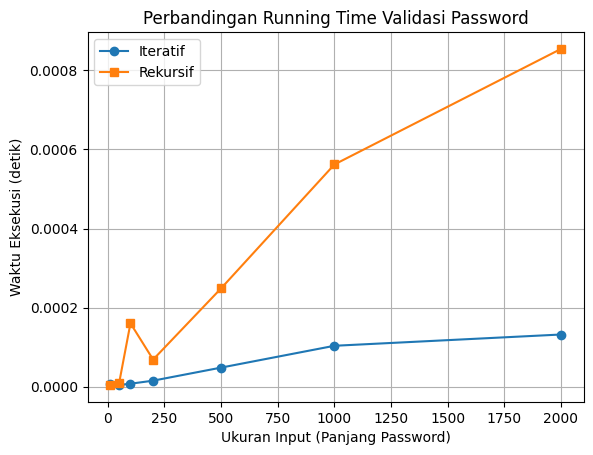

In [ ]:
plt.figure()
plt.plot(input_sizes, iterative_times, marker='o', label='Iteratif')
plt.plot(input_sizes, recursive_times, marker='s', label='Rekursif')
plt.xlabel("Ukuran Input (Panjang Password)")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Running Time Validasi Password")
plt.legend()
plt.grid(True)
plt.show()